Source: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

Another example: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

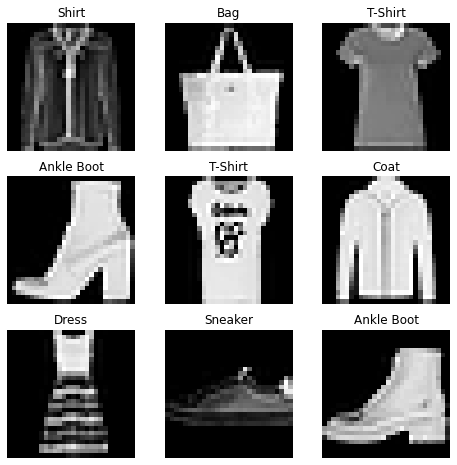

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [27]:
import os
import pandas as pd
from PIL import Image
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, img_annot_file, label_annot_file, transform=None):
        self.transform = transform
        with open(img_annot_file) as file:
            self.img_filenames = file.readlines()
        with open(label_annot_file) as file:
            self.img_labels = file.readlines()

    def __len__(self):
        return len(self.img_filenames)

    def __getitem__(self, idx):
        print("self.img_filenames[idx]: ", self.img_filenames[idx])
        image = Image.open(self.img_filenames[idx][:-1])
        label = self.img_labels[idx][:-1]
        if self.transform:
            image = self.transform(image)
        return image, label


In [28]:
from torch.utils.data import DataLoader

mycustom_dataset = CustomImageDataset("data/annot.txt", "data/labels.txt", ToTensor())
mycustom_train_dataloader = DataLoader(mycustom_dataset, batch_size=2, shuffle=False)

In [29]:
for img, labels in mycustom_train_dataloader:
    print("img: ", type(img))
    print("img shape: ", img.shape)
    print("labels: ", type(labels))
    print("labels: ", labels)
    break

self.img_filenames[idx]:  data/1.jpg

self.img_filenames[idx]:  data/2.jpg

img:  <class 'torch.Tensor'>
img shape:  torch.Size([2, 3, 224, 224])
labels:  <class 'tuple'>
labels:  ('1', '2')


Source: https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Face Landmark Dataset